In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/PravinSabariBala/Business-Analysis-on-UCI-sales-dataset/main/Final_dataset.csv')


In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [7]:
if 'Customer ID' in df.columns:
    df.rename(columns={'Customer ID':'Customer_ID'},inplace=True) 

In [8]:
df.describe()

,Quantity,Price,Customer_ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [10]:
df = df[df['Quantity']>0]
df = df[df['Price']>0]

In [11]:
df.describe()

,Quantity,Price,Customer_ID
count,805549.000000,805549.000000,805549.000000
mean,13.290522,3.206561,15331.954970
std,143.634088,29.199173,1696.737039
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


### returns invoices without letter c, where c denotes cancelled or returned orders

In [12]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [13]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [14]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [15]:
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

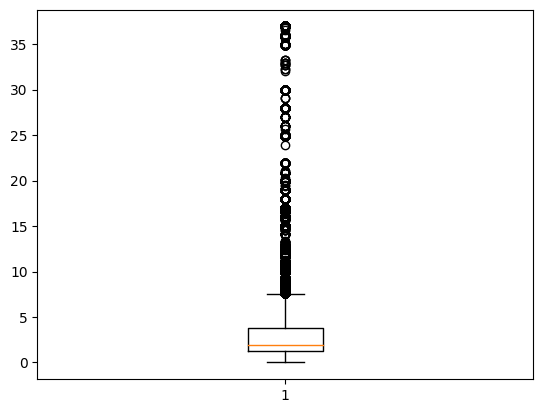

In [16]:
plt.boxplot(df['Price'])
plt.show()

In [17]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer_ID', 'Country'],
      dtype='object')

let's take only UK

In [18]:
df_uk = df[df['Country'] == 'United Kingdom']

In [19]:
df_uk.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).head(20)

Quantity
Invoice Description                                  
489434   WHITE CHERRY LIGHTS                     12.0
        15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0
        FANCY FONT HOME SWEET HOME DOORMAT       10.0
        PINK CHERRY LIGHTS                       12.0
        PINK DOUGHNUT TRINKET POT                24.0
        RECORD FRAME 7" SINGLE SIZE              48.0
        SAVE THE PLANET MUG                      24.0
        STRAWBERRY CERAMIC TRINKET BOX           24.0
489435  CAT BOWL                                 12.0
        DOG BOWL , CHASING BALL DESIGN           12.0
        HEART MEASURING SPOONS LARGE             24.0
        LUNCHBOX WITH CUTLERY FAIRY CAKES        12.0
489436   PEACE WOODEN BLOCK LETTERS               3.0
        AREA PATROLLED METAL SIGN                12.0
        ASSORTED COLOUR BIRD ORNAMENT            16.0
        BATH BUILDING BLOCK WORD                  3.0
        BISCUITS SMALL BOWL LIGHT BLUE            8.0
        BLACK DINER WALL CLOCK                    2.0
        CHRISTMAS CRAFT WHITE FAIRY              12.0
        CLASSIC WHITE FRAME                       6.0

In [20]:
df_uk.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().iloc[0:5, 0:5]

Quantity                            \
Description   DOORMAT UNION JACK GUNS AND ROSES  3 STRIPEY MICE FELTCRAFT   
Invoice                                                                     
489434                                      NaN                       NaN   
489435                                      NaN                       NaN   
489436                                      NaN                       NaN   
489437                                      NaN                       NaN   
489438                                      NaN                       NaN   

                                                                           \
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE   
Invoice                                                                     
489434                                 NaN                            NaN   
489435                                 NaN                            NaN   
489436                                 NaN                            NaN   
489437                                 NaN                            NaN   
489438                                 NaN                            NaN   

                              
Description  ANIMAL STICKERS  
Invoice                       
489434                   NaN  
489435                   NaN  
489436                   NaN  
489437                   NaN  
489438                   NaN

print 1 to values greater than zero with the lambda function

In [21]:
def create_invoice_product_df(dataframe):
    
    return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
        applymap(lambda x: 1 if x > 0 else 0)

uk_inv_pro_df = create_invoice_product_df(df_uk)
display(uk_inv_pro_df.head())


Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
frequent_itemsets = apriori(uk_inv_pro_df,
                            min_support=0.01,
                            use_colnames=True)

In [23]:
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
500,0.140157,(WHITE HANGING HEART T-LIGHT HOLDER)
382,0.085150,(REGENCY CAKESTAND 3 TIER)
30,0.074655,(ASSORTED COLOUR BIRD ORNAMENT)
219,0.071286,(JUMBO BAG RED RETROSPOT)
316,0.057869,(PARTY BUNTING)
...,...,...
625,0.010077,"(JUMBO STORAGE BAG SUKI, LUNCH BAG CARS BLUE)"
66,0.010077,(CHARLOTTE BAG APPLES DESIGN)
639,0.010047,"(LUNCH BAG DOLLY GIRL DESIGN, LUNCH BAG CARS B..."
702,0.010018,"(HEART OF WICKER SMALL, WHITE HANGING HEART T-..."


In [24]:
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01)

In [25]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.031573,0.047256,0.015384,0.487252,10.310993,0.013892,1.858115
1,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.047256,0.031573,0.015384,0.325552,10.310993,0.013892,1.435881
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.047256,0.030053,0.015563,0.329338,10.958641,0.014143,1.446252
3,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.030053,0.047256,0.015563,0.517857,10.958641,0.014143,1.976062
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047256,0.041800,0.019558,0.413880,9.901536,0.017583,1.634820
...,...,...,...,...,...,...,...,...,...
397,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN PI...",(WOODEN FRAME ANTIQUE WHITE ),0.013416,0.051251,0.010614,0.791111,15.436101,0.009926,4.541885
398,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...",(WOOD 2 DRAWER CABINET WHITE FINISH),0.028979,0.031007,0.010614,0.366255,11.812081,0.009715,1.528996
399,(WOOD 2 DRAWER CABINET WHITE FINISH),"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...",0.031007,0.028979,0.010614,0.342308,11.812081,0.009715,1.476406
400,(WOODEN FRAME ANTIQUE WHITE ),"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN PI...",0.051251,0.013416,0.010614,0.207097,15.436101,0.009926,1.244268


In [26]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [27]:
arl_recommender(rules, "60 TEATIME FAIRY CAKE CASES", rec_count=5) 

['PACK OF 60 DINOSAUR CAKE CASES',
 '72 SWEETHEART FAIRY CAKE CASES',
 'PACK OF 60 SPACEBOY CAKE CASES',
 'PACK OF 60 PINK PAISLEY CAKE CASES',
 'PACK OF 72 RETRO SPOT CAKE CASES']